# 1. Problem statement:
Customer churn is a major problem for businesses of all sizes. In the telecommunications industry, for example, the average annual churn rate is 15-25%. This means that businesses are constantly losing customers, which can have a significant impact on their bottom line.
There are a number of factors that can contribute to customer churn, such as:

1. Poor customer service
2. High prices
3. Lack of competitive products or services
4. Competition from other businesses
5. Changes in customer needs or preferences

By understanding the factors that contribute to customer churn, businesses can take steps to reduce it. This can include improving customer service, offering competitive prices, and developing new products and services that meet the needs of their customers.

# 2. Project Objective:
The goal of this project is to develop a customer churn prediction model that can be used to identify customers who are at risk of churning. This model will be used to target customers with specific interventions, such as offering them discounts or upgrades, in order to reduce the likelihood of them churning.

The project will also identify the factors that contribute to customer churn. This information will be used to develop strategies for reducing churn, such as improving customer service, offering competitive prices, running new campaings, and developing new products and services that meet the needs of customers.

# 3. Data set description:
The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [40]:
# Importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 

import warnings

warnings.filterwarnings("ignore")

In [41]:
# Reading data 
df = pd.read_csv(r"C:\Users\prasa\Dropbox\PC\Desktop\ML-Projects\Portfolio\Customer Churn\customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 4. Performing EDA

In [42]:
print("Shape of the data frame: ",df.shape)

Shape of the data frame:  (7043, 21)


In [43]:
print("Null values present in the dataset:\n",df.isna().sum())

Null values present in the dataset:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [44]:
# Summarizing the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


####  <h4><center>Observations</center></h4>:
* Most of the features are categorical.
* Data contains no null values. 
* Confusingly, TotalCahrges is in "String" format. This could be a mistake in the data. We should pay attention to this while visualizing the data as a part of univariate or multivariate analysis.


### 4.1. Understanding the distrubution of the target variable

Customers who churned:  5174
Customers who stayed:  1869


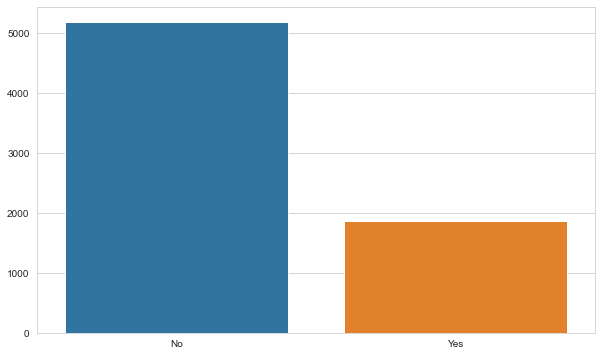

In [45]:
churn_dist  = df['Churn'].value_counts()
print("Customers who churned: ",churn_dist[0])
print("Customers who stayed: ",churn_dist[1])
plt.figure(figsize=(10,6))
sb.barplot(x=churn_dist.index,y=churn_dist.values)
plt.show()

#### Observation:
As per the distribution, it is clear that the dataset is imbalanced. This should be handled while training the model.

### 4.2. Analysing the  numerical variables: 
[SeniorCitizen, tenure, MonthlyCharges, TotalCharges]

In [46]:
# Converting TotalCharges feature into float type for better visualization
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')


In [47]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


####  <h4><center>Observations</center></h4>:
* `SeniorCitizen`: Looks like this is a categorical representation of whether the citizen is Senior or not. 

* `tenure`: 75 percentile of the customer base is under 55 months tenure. That means loyal customers are existing in a good number

* `MonthlyCharges`: No null values exisit in the data.

* `TotalCharges`: 11 NaN values are found. These nulls should be handled properly using imputation techniques during feature engineering.



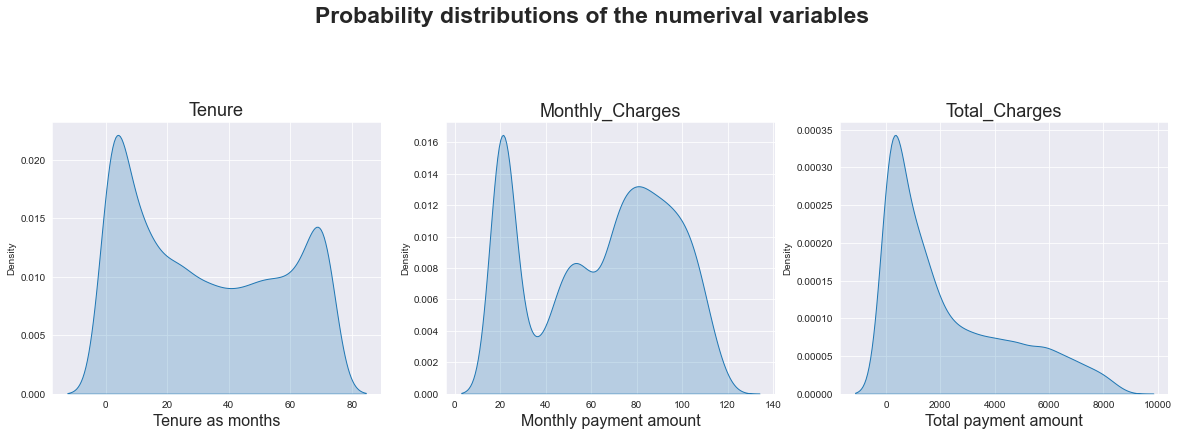

In [48]:
sb.set_style(style='darkgrid')
fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(20,5),sharex=False,sharey=False)
plt.suptitle(t='Probability distributions of the numerival variables',fontsize=23,fontweight='bold',y=1.2)

# Tenure plot 
sb.kdeplot(data=df['tenure'],ax=axis[0],shade=True)
axis[0].set_title('Tenure',fontsize=18)
axis[0].set_xlabel("Tenure as months",fontsize=16)

# MonthlyCharges
sb.kdeplot(data=df['MonthlyCharges'],shade=True,ax=axis[1])
axis[1].set_title("Monthly_Charges",fontsize=18)
axis[1].set_xlabel("Monthly payment amount",fontsize=16)

# Total_Charges
sb.kdeplot(data=df['TotalCharges'],shade=True,ax=axis[2])
axis[2].set_title("Total_Charges",fontsize=18)
axis[2].set_xlabel("Total payment amount",fontsize=16)

plt.show()



#  <h4><center>Observations</center></h4> 
1. `Tenure` distribution is appearing to be bimodal distribution. Majority of the customer are tend to be either relatively new (0-10 months) or tend to be willing to stay for more period(>5 years).
     - With the above distribution it is very clear that there are some issues for the new customers that are stopping them to continue further. If we can successfully predict which customers are in danger of churn, we can be able to control this rate of churning by providing some extra perks to stay with the company.
     
2. `MonthlyCharge` distribution resembles bimodel distribution with a slight peak in the middle. As per the distribution, it is clear that Majority of the customers are preferring either low monthly payments or willing to pay high payments. 

3. `TotalCharges` distribution is a right skewed distribution, that indicates most of the customers are opting for lower Totalpayments. 

Here we we understood the customer behavior in terms of their spend with the company and their payment amounts. Let's add the target variable to our analysis and observe the changes/patterns.

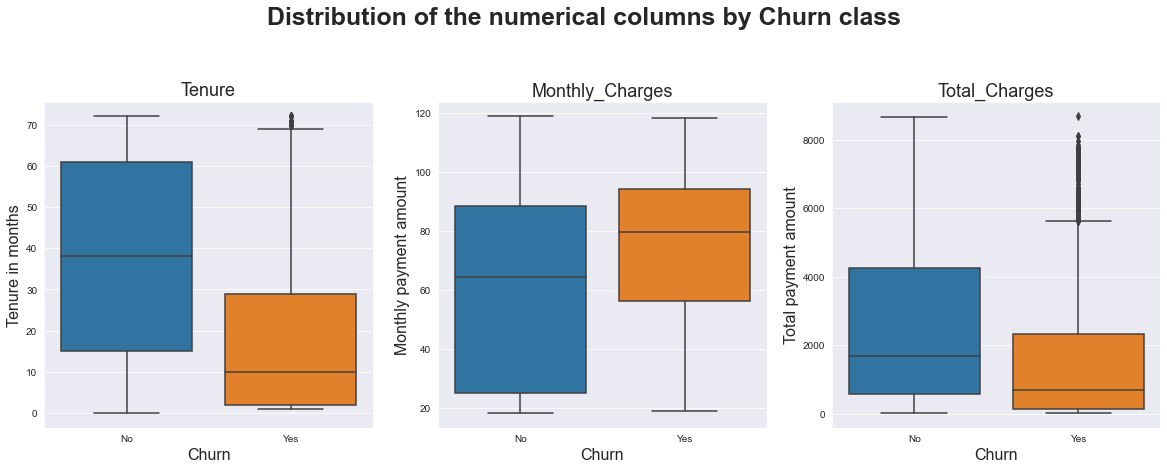

In [49]:
sb.set_style(style='darkgrid')
fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
plt.suptitle("Distribution of the numerical columns by Churn class",fontsize=25,y=1.1,fontweight='bold')

# Tenure
sb.boxplot(data=df,x='Churn',y='tenure',ax=axis[0])
axis[0].set_title('Tenure',fontsize=18)
axis[0].set_xlabel('Churn',fontsize=16)
axis[0].set_ylabel("Tenure in months",fontsize=16)


# Monthly_Charges
sb.boxplot(data=df,x='Churn',y='MonthlyCharges',ax=axis[1])
axis[1].set_title("Monthly_Charges",fontsize=18)
axis[1].set_xlabel('Churn',fontsize=16)
axis[1].set_ylabel('Monthly payment amount',fontsize=16)


# Total_Charges

sb.boxplot(data=df,x='Churn',y='TotalCharges',ax = axis[2])
axis[2].set_title("Total_Charges",fontsize=18)
axis[2].set_xlabel("Churn",fontsize=16)
axis[2].set_ylabel("Total payment amount",fontsize=16)

plt.show()


# <h4><center>Observations</center></h4>
1. `Tenure`: Customers who churned are the customers that spend less time with the company.

2. `MonthlyCharges`: Customers who churned tend to have higher monthly charge amount than other non churn customers. 

3. `TotalCharges`: Churned customers are having low `TotalCharges` comparing to non-churned members. 

* By looking at the `TotalCharges` distribution, we can find some descent no of outlined observations. These outliers indicates that there are considerable no of customers who stayed with the company for a long time and they tend to churn because of some x factors. Generally speaking they are the very old customers who stayed with the company over years and paid high `TotalCharges`. 

Let's try to understand more about these outlier observations.

In [50]:
q1  = df[df['Churn']=='Yes']['TotalCharges'].quantile(0.25)
q3  = df[df['Churn']=='Yes']['TotalCharges'].quantile(0.75)
iqr = q3-q1
lower_bound = q1-iqr*1.5
upper_bound = q3+iqr*1.5

print("Lower bound is: ",lower_bound)
print("Upper bound is: ", upper_bound)

print("no of customers in the outlined region: ",len(df[(df['Churn']=='Yes')&(df['TotalCharges']>upper_bound)]))

outlined_customers = df[(df['Churn']=='Yes')&(df['TotalCharges']>upper_bound)]
# Total amount received by the outlined customers in the form of TotalCharges 
total_paymet_received = outlined_customers['TotalCharges'].sum()
print("Total amount received by the outlined customers in the form of TotalCharges: ", total_paymet_received)
print("Total amount recieved amount by all the customers: ",df['TotalCharges'].sum())
print("Avg amount spend by each outlined customer: ",outlined_customers['TotalCharges'].mean())

Lower bound is:  -3160.7000000000003
Upper bound is:  5626.5
no of customers in the outlined region:  109
Total amount received by the outlined customers in the form of TotalCharges:  727060.6500000001
Total amount recieved amount by all the customers:  16056168.7
Avg amount spend by each outlined customer:  6670.281192660553


# <h4><center>Observations</center></h4>
* There are 109 such best-paying customers who ended up churning.  On average, each person spent \\$6,670 over their entire customer lifetime, and as a whole, the entire group of outliers ended up contributing approximately \\$727,060 to the company's bottom line. 

* These individuals are our most valuable customers, and we would like to retain them as much as possible.  By being able to predict whether or not such customers are at risk of leaving, we will be better placed to offer these inviduals incentives to stay.

# <h3>Checking for correlation within the numerical data.</h3>
* If The variables are extreemly correlated with each other then some of the features can be dropped to avoid the problem of multicollinearity

<AxesSubplot:>

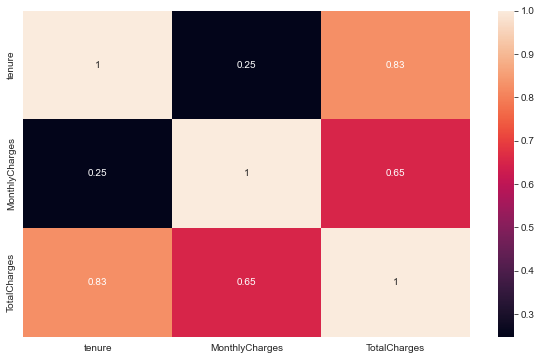

In [51]:
# Generating correlation matrix and visualising with heatmap
corre_matrix = df[['tenure','MonthlyCharges','TotalCharges']].corr()
plt.figure(figsize=(10,6))
sb.heatmap(corre_matrix,annot=True,cbar='cmap')

* `tenure` and `TotalCharges` are correlated with each other with a factor of 0.83. This is obivious that, more `tenure` indicates more `TotalCharges` from the customer. But this is not such a high correlation to drop any one feature. So we will be continuing with both the features.

* `MonthlyCharges` and `TotalCharges` are moderly correlated. This might be a subscription based bussinesss that's why MonthlyCharges and TotalCharges are not related to such high extent.

### 4.3. Analysing the Categorical features.

In [52]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
categorical_features = df.drop(columns=['Churn','customerID']).select_dtypes(include=['object']).columns
# Converting  SeniorCitizen to oject format
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df.replace(to_replace={'SeniorCitizen':{'0':'No','1':'Yes'}},inplace=True)

categorical_features

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

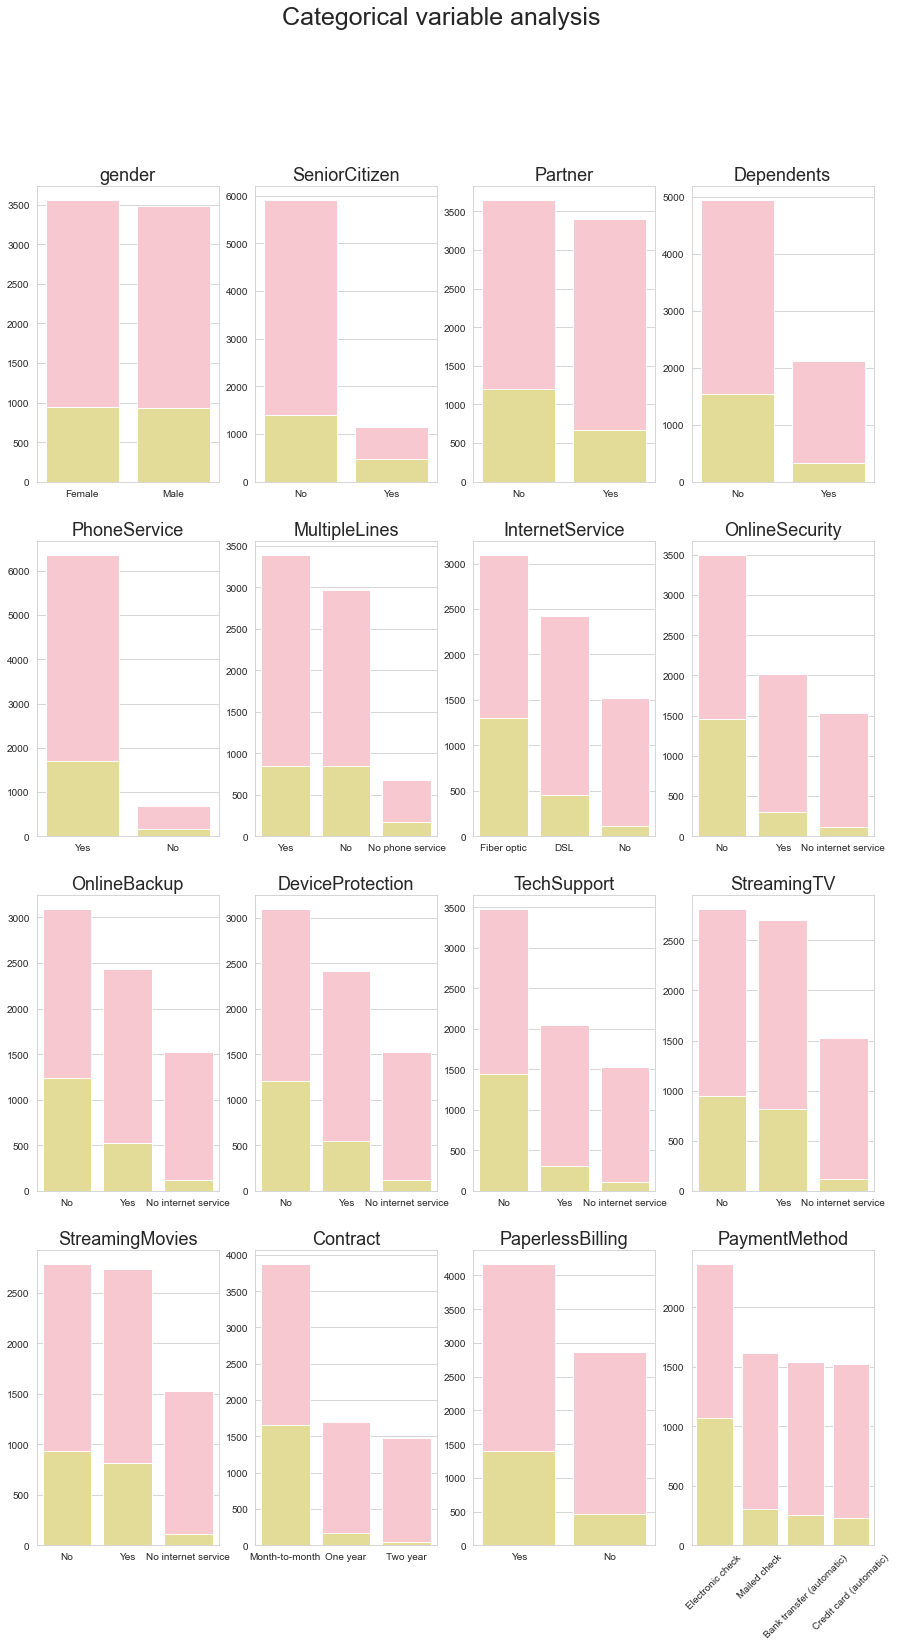

In [56]:
# Visualizing the features4
sb.set_style(style='whitegrid')
fig,axis = plt.subplots(nrows=4,ncols=4,figsize=(15,25),sharex=False,sharey=False)
plt.suptitle("Categorical variable analysis",fontsize=25)

index_value = 0
for i in range(4):
    for j in range(4):
        value_counts_data = df[categorical_features[index_value]].value_counts()
        value_counts_data_churn = df[df['Churn']=='Yes'][categorical_features[index_value]].value_counts()
        
        sb.barplot(x=value_counts_data.index,y=value_counts_data.values,ax=axis[i][j],color='pink')
        sb.barplot(x=value_counts_data_churn.index,y=value_counts_data_churn.values,color='khaki',ax=axis[i][j])
        
        axis[i][j].set_title(categorical_features[index_value],fontsize=18)
        plt.xticks(rotation=45)
        
        index_value+=1

#  <h4> <center>Observations</center></h4>
1. Apparantly important features: 
    - `Contract`: The longer the contract, less likely the customer to churn 
    - `PaymentMethod`: Majority of the customers who are churning are electronic check payment method. 
    - Customers having no `TechSupport`, no `OnlineBackup` and no `DeviceProtection` are likely to churn more.
    - `InternetServices`: Customers who are having optic fiber are more likely to churn.
    - `OnlineSecurity`: Customers with no online security are willing to churn more.


### 5. Feature Engineering

#### Handling NaN values in the dataset

In [57]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [58]:
df[df['TotalCharges'].isna()][['tenure','MonthlyCharges']]

,tenure,MonthlyCharges
488,0,52.55
753,0,20.25
936,0,80.85
1082,0,25.75
1340,0,56.05
3331,0,19.85
3826,0,25.35
4380,0,20.00
5218,0,19.70
6670,0,73.35


* `tenure` of the customers who are having `TotalCharge` as NaN is 0. that means they are the new customers and didn't pay any charges yet. It's better to keep 0 inplace of NaN in TotalCharges field.

In [59]:
# Imputing 0 inplace in TotalCharges features
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [61]:
# Creating a copy of the Data frame for Power BI project
df_bi = df.copy()

In [62]:
# Dividing the data into target and independent variable sets
X = df.drop('Churn',axis=1)
y = df['Churn']
print(X.shape)
print(y.shape)

(7043, 20)
(7043,)


In [63]:
# Dropping the features that are irrelevent in  prediction 
cols_to_drop = ['customerID']
X.drop(columns=cols_to_drop,axis=1,inplace=True)
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [73]:
# Performing Encoding on Categorical Features
cat_features = X.select_dtypes(include=['object']).columns
# Performing Label Encoding 
from sklearn.preprocessing import LabelEncoder
LE  = LabelEncoder()
for i in cat_features:
    X[i] = LE.fit_transform(X[i])

# Encoding the target values: {No: 0, Yes: 1}
y.replace(to_replace=({'No':0,'Yes':1}),inplace=True)

In [74]:
# !pip install -U threadpoolctl

In [75]:
# ! pip install scikit-learn==1.2.2

In [76]:
# Handling imbalanced data: As our dataset is small, performing Oversampling to avoid the effect of data loss in undersampling
from imblearn.over_sampling import SMOTE
over_sample = SMOTE(k_neighbors=5,n_jobs=-1)
X_over_sampled,y_over_sampled = over_sample.fit_resample(X,y)

<AxesSubplot:xlabel='count', ylabel='Churn'>

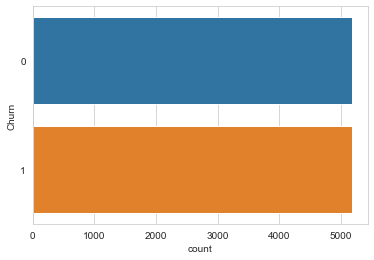

In [77]:
sb.countplot(y=y_over_sampled)

In [78]:
# Dividing the data into train and test splits
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over_sampled,y_over_sampled,test_size=0.1,random_state=120)

Our goal is to test an entire suite of classification algorithms on our data in order to pick out the candidates that are best suited to the structure of our problem.  In order to make the comparison a fair one, we must scale our features because some of the algorithms to be tested (Logistic Regression, SVM, Linear Discriminant Analysis, and KNN) are based on the assumption that data is standardized and centered around 0.

In [79]:
# Performing Scaling on the numerical features
num_features = df.select_dtypes(exclude=['object']).columns
num_features

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
X_train_scaled

array([[ 1.1540137 , -0.40152453, -0.77328862, ...,  0.44985295,
         0.0676249 , -0.89934116],
       [-0.86654084, -0.40152453,  1.29317822, ...,  0.44985295,
        -0.50889093,  0.47412444],
       [ 1.1540137 , -0.40152453,  1.29317822, ..., -0.55771812,
         0.18988287,  1.53529989],
       ...,
       [ 1.1540137 , -0.40152453,  1.29317822, ..., -0.55771812,
        -0.60821788, -0.17027001],
       [ 1.1540137 , -0.40152453, -0.77328862, ...,  0.44985295,
        -0.49843546,  0.53996589],
       [ 1.1540137 , -0.40152453, -0.77328862, ..., -0.55771812,
         0.42033138,  0.02953256]])

### Analysis of different models
In order to choose our final model, we will first evaluate an entire suite of algorithms to determine which candidates are best suited for the structure of our project.  

Let's start comparing!

### Test Suite

In [81]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Initializing our test suite
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=5,random_state=41)
final_results = {}
model_names=[]
model_names.append(('LR',LogisticRegression(max_iter=120)))
model_names.append(('LDA',LinearDiscriminantAnalysis()))
model_names.append(('KNN',KNeighborsClassifier()))
model_names.append(('Bayes',GaussianNB()))
model_names.append(('SVM',SVC()))
model_names.append(('XGboost',XGBClassifier()))

# Running the test suite
for name,model in model_names:
    score = cross_val_score(model,X=X_train_scaled,y=y_train,cv=cv,n_jobs=-1)
    results = {}
    results['model_name'] = name
    results['mean_of_score'] = score.mean()
    results['score_std'] = score.std()
    final_results[name] = results
    
print(final_results)
    
    


{'LR': {'model_name': 'LR', 'mean_of_score': 0.8054973297056766, 'score_std': 0.009905320339112275}, 'LDA': {'model_name': 'LDA', 'mean_of_score': 0.7999348267148203, 'score_std': 0.00949187487595037}, 'KNN': {'model_name': 'KNN', 'mean_of_score': 0.7896918048514431, 'score_std': 0.007524071796818924}, 'Bayes': {'model_name': 'Bayes', 'mean_of_score': 0.7838290112214052, 'score_std': 0.009733715033874614}, 'SVM': {'model_name': 'SVM', 'mean_of_score': 0.8247182252848592, 'score_std': 0.008777252817590401}, 'XGboost': {'model_name': 'XGboost', 'mean_of_score': 0.8444324752530048, 'score_std': 0.007651734700676523}}


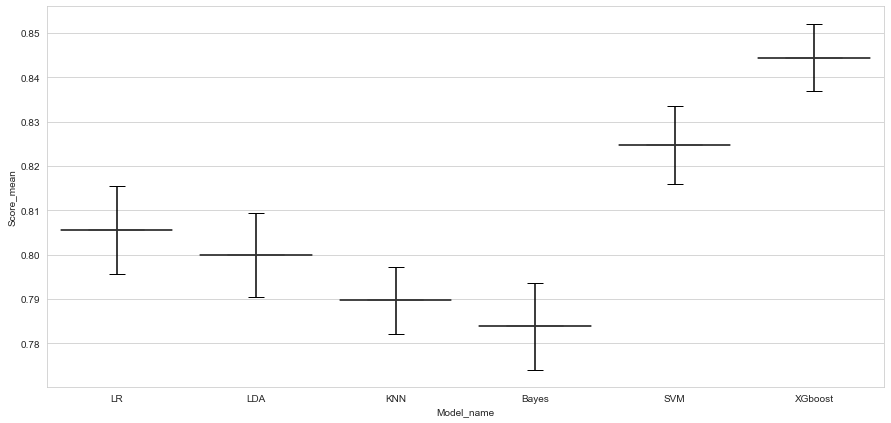

In [82]:
means = []
models=[]
stds=[]
for i in final_results.keys():
    models.append(i)
    means.append(final_results[i]['mean_of_score'])
    stds.append(final_results[i]['score_std'])
results_df = pd.DataFrame({'Model_name':models,"Score_mean":means,"Score_std":stds})
plt.figure(figsize=(15,7))
sb.boxplot(data=results_df,x='Model_name',y='Score_mean')
plt.errorbar(x=results_df['Model_name'],y=results_df['Score_mean'],yerr=results_df['Score_std'],fmt='none',capsize=8,color='black')
plt.show()

As we can see, our **XGBoost** and **SVM** models performed the best with other models

For this project, we will select XGBoost and SVM for further hyperparameter tuning due to their high predictive potential.

### Performing Hyper parameter tuning inorder to fine tune our model


In [83]:
# Implementing Randomized gridsearch CV


In [84]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators':[20,50,30,80,100],
    'max_depth':[3,5,7,9,11],
    'learning_rate':[0.01,0.03,0.05,0.07,0.1],
    'lambda':[1e-3,1e-1,2,4,6,10],
    
}
RandomCv = RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=random_grid,n_iter=100,cv=5,n_jobs=-1)
RandomCv.fit(X_train_scaled,y_train)
RandomCv.best_params_


{'n_estimators': 100, 'max_depth': 11, 'learning_rate': 0.1, 'lambda': 0.1}

In [85]:
# Performing Grid searchCv based on the results of Randomsearch CV
from sklearn.model_selection import GridSearchCV
grid = {
    'n_estimators':[90,95,100,105,110],
    'max_depth':[8,11,13,15],
    'learning_rate':[0.1,0.2,0.9,0.07,0.04]
    
}

GCV = GridSearchCV(estimator=XGBClassifier(),param_grid=grid,n_jobs=-1,cv=5)
GCV.fit(X_train_scaled,y_train)
GCV.best_params_


{'learning_rate': 0.1, 'max_depth': 13, 'n_estimators': 110}

In [86]:
XGB = XGBClassifier(learning_rate= 0.1, max_depth= 8, n_estimators= 95)
XGB.fit(X_train_scaled,y_train)

y_predict = XGB.predict(X_test_scaled)



In [87]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       531
           1       0.86      0.81      0.83       504

    accuracy                           0.84      1035
   macro avg       0.84      0.84      0.84      1035
weighted avg       0.84      0.84      0.84      1035



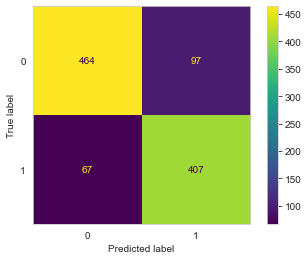

In [88]:
cm = confusion_matrix(y_test,y_predict,labels=XGB.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=XGB.classes_)
display.plot()
plt.grid()
plt.show()

In this project, we analyzed customer data to predict whether customers would churn or not churn.
Our trained model had the following predictive potential:

 **XGBoost**: 0.84


As for our next steps, we will pass over the XGBoost model to the company's Customer Retention group in order to better inform their business strategy. By targeting those customers who are most likely to churn, the company would be able to cut costs via more efficient allocation of resources towards customer interaction programs. 

Furthermore, the company would enjoy increased revenue via its improved retention strategy.  By using our model to help convert 'high-flight-risk' customers to a more loyal following, the company would be looking at maintaing a valuable, mutually-beneficial relationship with its customer base for many years to come.

## Performing prediction for all the customers (Required for Power BI project):

In [91]:
df_bi.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3032,5696-EXCYS,Male,No,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.45,369.05,No
3295,4900-MSOMT,Female,No,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),80.20,5714.20,No
3338,1513-XNPPH,Female,No,No,No,12,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,89.40,1095.65,Yes


In [110]:
# Identifying the Target and Independent variables
X = df_bi.drop(['customerID','Churn'],axis=1)
cust_id = df_bi['customerID']
y = df_bi['Churn']


In [111]:
# Encoding the categorical features 

cat_features = X.select_dtypes('object').columns
for i in cat_features:
    X[i] = LE.fit_transform(X[i])

# Encoding the target values: {No: 0, Yes: 1}
y.replace(to_replace=({'No':0,'Yes':1}),inplace=True)

In [112]:
# Encoding the num_features 
X_scaled = sc.transform(X)

In [115]:
# Predicting with the trained model 
predicted_result = XGB.predict(X_scaled)

In [121]:
# Evaluating the results
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report
print("Accuracy of the prediction : ",accuracy_score(y,predicted_result))
print("Recall of the prediction : ",recall_score(y,predicted_result))
print("Classification report of the prediction :\n ",classification_report(y,predicted_result))

Accuracy of the prediction :  0.8945051824506602
Recall of the prediction :  0.8640984483681113
Classification report of the prediction :
                precision    recall  f1-score   support

           0       0.95      0.91      0.93      5174
           1       0.77      0.86      0.81      1869

    accuracy                           0.89      7043
   macro avg       0.86      0.88      0.87      7043
weighted avg       0.90      0.89      0.90      7043



In [122]:
# Predicting the probabilities 
predicted_probability = XGB.predict_proba(X_scaled)


In [131]:
# Generating the output data frame
df_bi["predicted_churn"] = predicted_result
df_bi["predicted_probability"] = predicted_probability[:,1]

In [133]:
# Exporting the data frame
excel_filename = "prediction_results.xlsx"
df_bi.to_excel(excel_filename, index=False)